In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [31]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

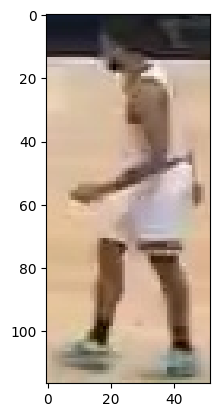

In [32]:
plt.imshow(image)
plt.show()

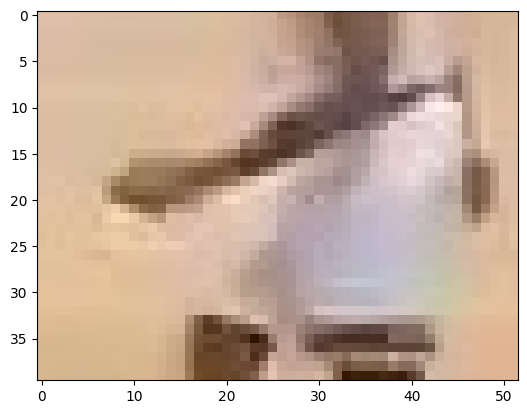

In [33]:
c = 20
top_half_image=  image[int(image.shape[0]/2) - c: int(image.shape[0]/2) + c, :]
plt.imshow(top_half_image)
plt.show()

C:\Users\alber\anaconda3\envs\tf_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


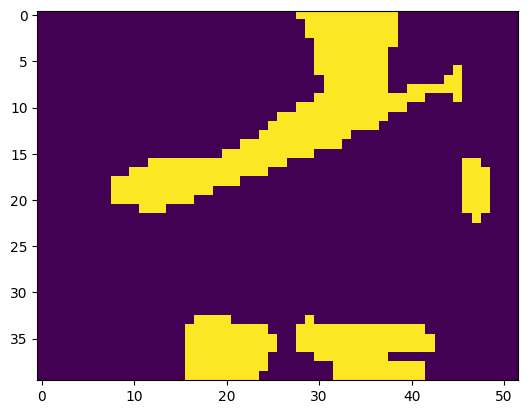

In [34]:
import os
os.environ["OMP_NUM_THREADS"] = "4"

image_2d = top_half_image.reshape(-1, 3)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

labels = kmeans.labels_

clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

plt.imshow(clustered_image)
plt.show()

In [35]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [36]:
player_cluster = 1-non_player_cluster
print(player_cluster)

1


In [37]:
kmeans.cluster_centers_[player_cluster]

array([120.88772846,  92.50130548,  76.82245431])